In [3]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import sys
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
import torch.optim as optim
import torch.nn as nn

import torchvision.transforms as transforms
import torchvision
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
torch.manual_seed(0)
np.random.seed(0)
import random
random.seed(0)
# import PoE module
sys.path.append('/Users/siyuhe/Spatial_project')
import PoE.utils as utils
import PoE.dataloader_1002 as dataloader
import PoE.utils_plots as utils_plots
import PoE.main as main

import anndata
import json
from scipy.stats import zscore

In [260]:
# load all expression data  [spot x gene]
data_path = 'data'
sample_ids = [
             'MBC_1A',
             'MBC_1B',
             'MBC_2A',
             'MBC_2B',
             'MBC_3A',
             'MBC_3B',
             'MBC_4A',
             'MBC_4B',
             'CID4465',
             'CID444971',
             '1142243F',
             '1160920F'
            ]
sample_ids = [
             
             'MBC_1A',
             
            ]

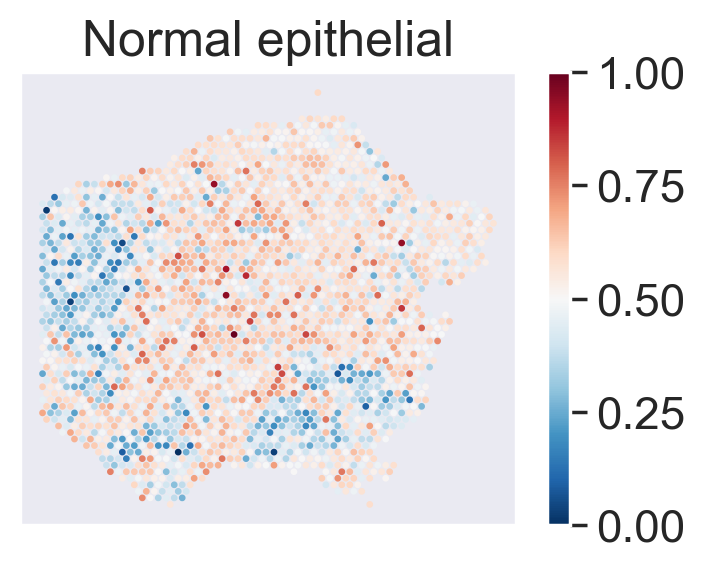

In [261]:
for sample_id in sample_ids:
    
    
    map_info = pd.read_csv("../results/02_PoE_factor/"+sample_id+'map_info.csv')
    
    mu_poe_stack_df = pd.read_csv("../results/02_PoE_factor/"+sample_id+'nb_file.csv')
    mu_poe_stack_df.index = mu_poe_stack_df.iloc[:,0]
    mu_poe_stack_df = mu_poe_stack_df.drop(mu_poe_stack_df.columns[0], axis=1)
    mu_poe_stack_df = (mu_poe_stack_df-mu_poe_stack_df.min())/(mu_poe_stack_df.max()-mu_poe_stack_df.min())
    #mu_poe_stack_df = mu_poe_stack_df.T.apply(zscore).T    
    #c_max = 1#0.5
    #c_min = 0#-1.5
    
    c_max = 2
    c_min = -2
    
    all_spot = mu_poe_stack_df
    
    all_loc = np.array(map_info.loc[map_info['sample']==sample_id,['array_col','array_row']])
    
    fig,ax= plt.subplots(1,1,figsize=(4,3),dpi=200)
    for i in range(1):
        for j in range(1):
            plotted_cell_idx = 24
            if plotted_cell_idx<mu_poe_stack_df.shape[1]:
                plotted_cell= mu_poe_stack_df.columns[plotted_cell_idx]
                #ax=axs[i,j]
                
                #ddd = ddd/ddd.max()
                ddd = pd.DataFrame(all_spot.loc[:,plotted_cell])
                ddd = np.array(ddd)
                #ddd = np.array(ddd.T.apply(zscore).T)
                #ddd = (ddd-ddd.min())/(ddd.max()-ddd.min())
                #ddd = np.clip(ddd, -1, 2)
                #ddd = mu_poe_stack_df.sum(axis=1)
                g=ax.scatter(all_loc[:,0],-all_loc[:,1],s=2,c=ddd,cmap='RdBu_r',
                             #vmin=c_min, vmax=c_max
                            )
                plt.colorbar(g, ax=ax)
                ax.set_title(plotted_cell)
                ax.set_xticks([])
                ax.set_yticks([]) 


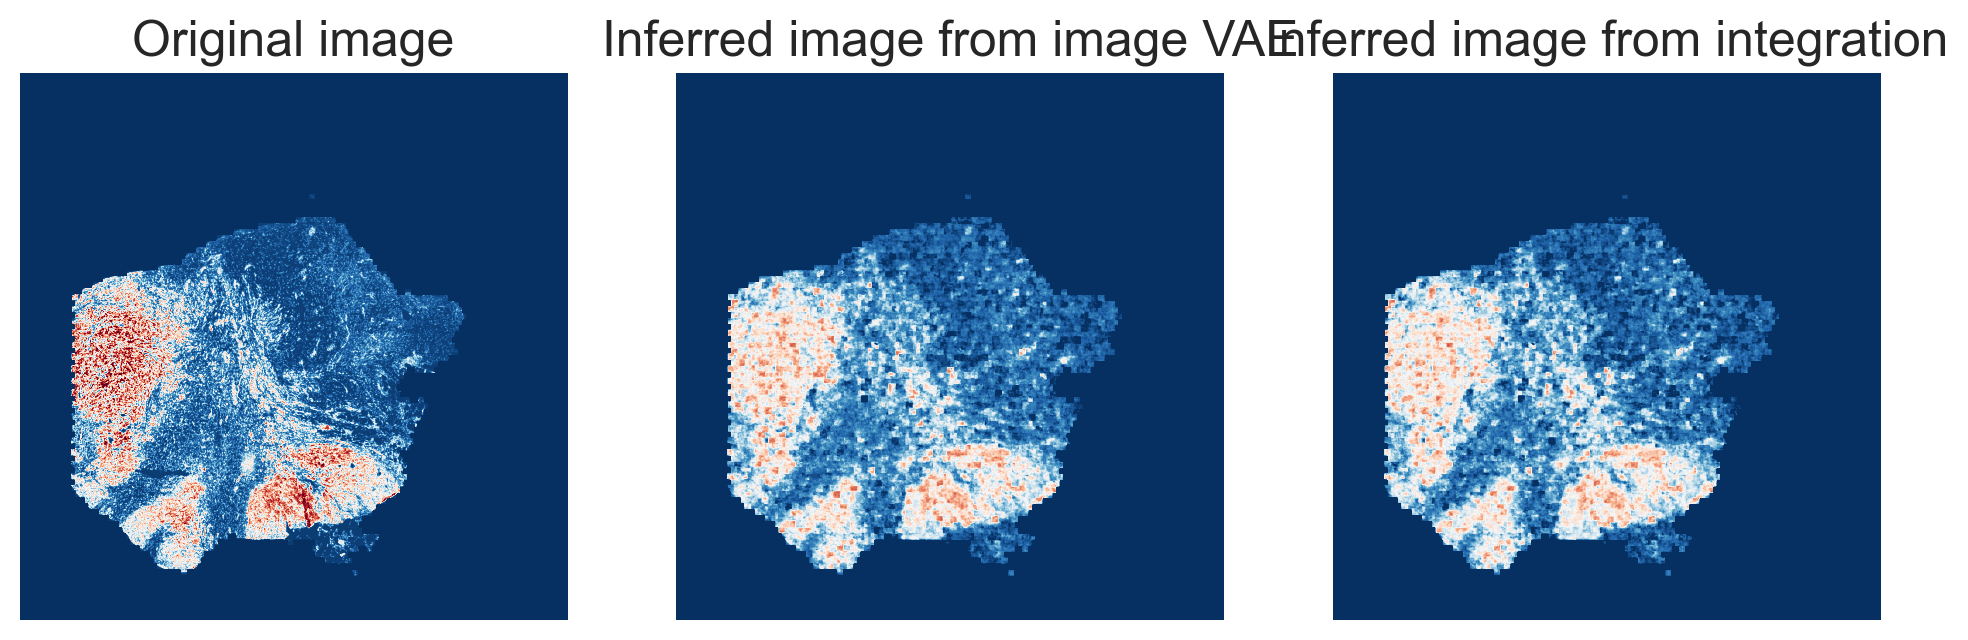

In [262]:
for sample_id in sample_ids:
    wholeimg_stitch  = np.load("../results/02_PoE_factor/"+sample_id+'wholeimg_stitch.npy')
    recon_wholeimg_stitch = np.load("../results/02_PoE_factor/"+sample_id+'recon_wholeimg_stitch.npy')
    recon_poe_wholeimg_stitch = np.load("../results/02_PoE_factor/"+sample_id+'recon_poe_wholeimg_stitch.npy')

    fig,axs=plt.subplots(1,3,figsize=(12,5),dpi=200)
    image_slide_z = 0
    vmax = 0.8
    vmin = 0

    ax=axs[0]
    ax.imshow(wholeimg_stitch[:,:,image_slide_z],cmap='RdBu_r',vmax=vmax,vmin=vmin)
    ax.axis('off')
    ax.set_title('Original image')

    ax=axs[1]
    ax.imshow(recon_wholeimg_stitch[:,:,image_slide_z],cmap='RdBu_r',vmax=vmax,vmin=vmin)
    ax.axis('off')
    ax.set_title('Inferred image from image VAE')

    ax=axs[2]
    ax.imshow(recon_poe_wholeimg_stitch[:,:,image_slide_z],cmap='RdBu_r',vmax=vmax,vmin=vmin)
    ax.axis('off')
    ax.set_title('Inferred image from integration')
    

In [263]:
wholeimg_stitch.max()

1.0

In [264]:
data_path = '../data'
adata_image = io.imread(os.path.join(data_path, sample_id, 'spatial','tissue_hires_image.png'))
#adata_image = (adata_image*255).astype(np.uint8)

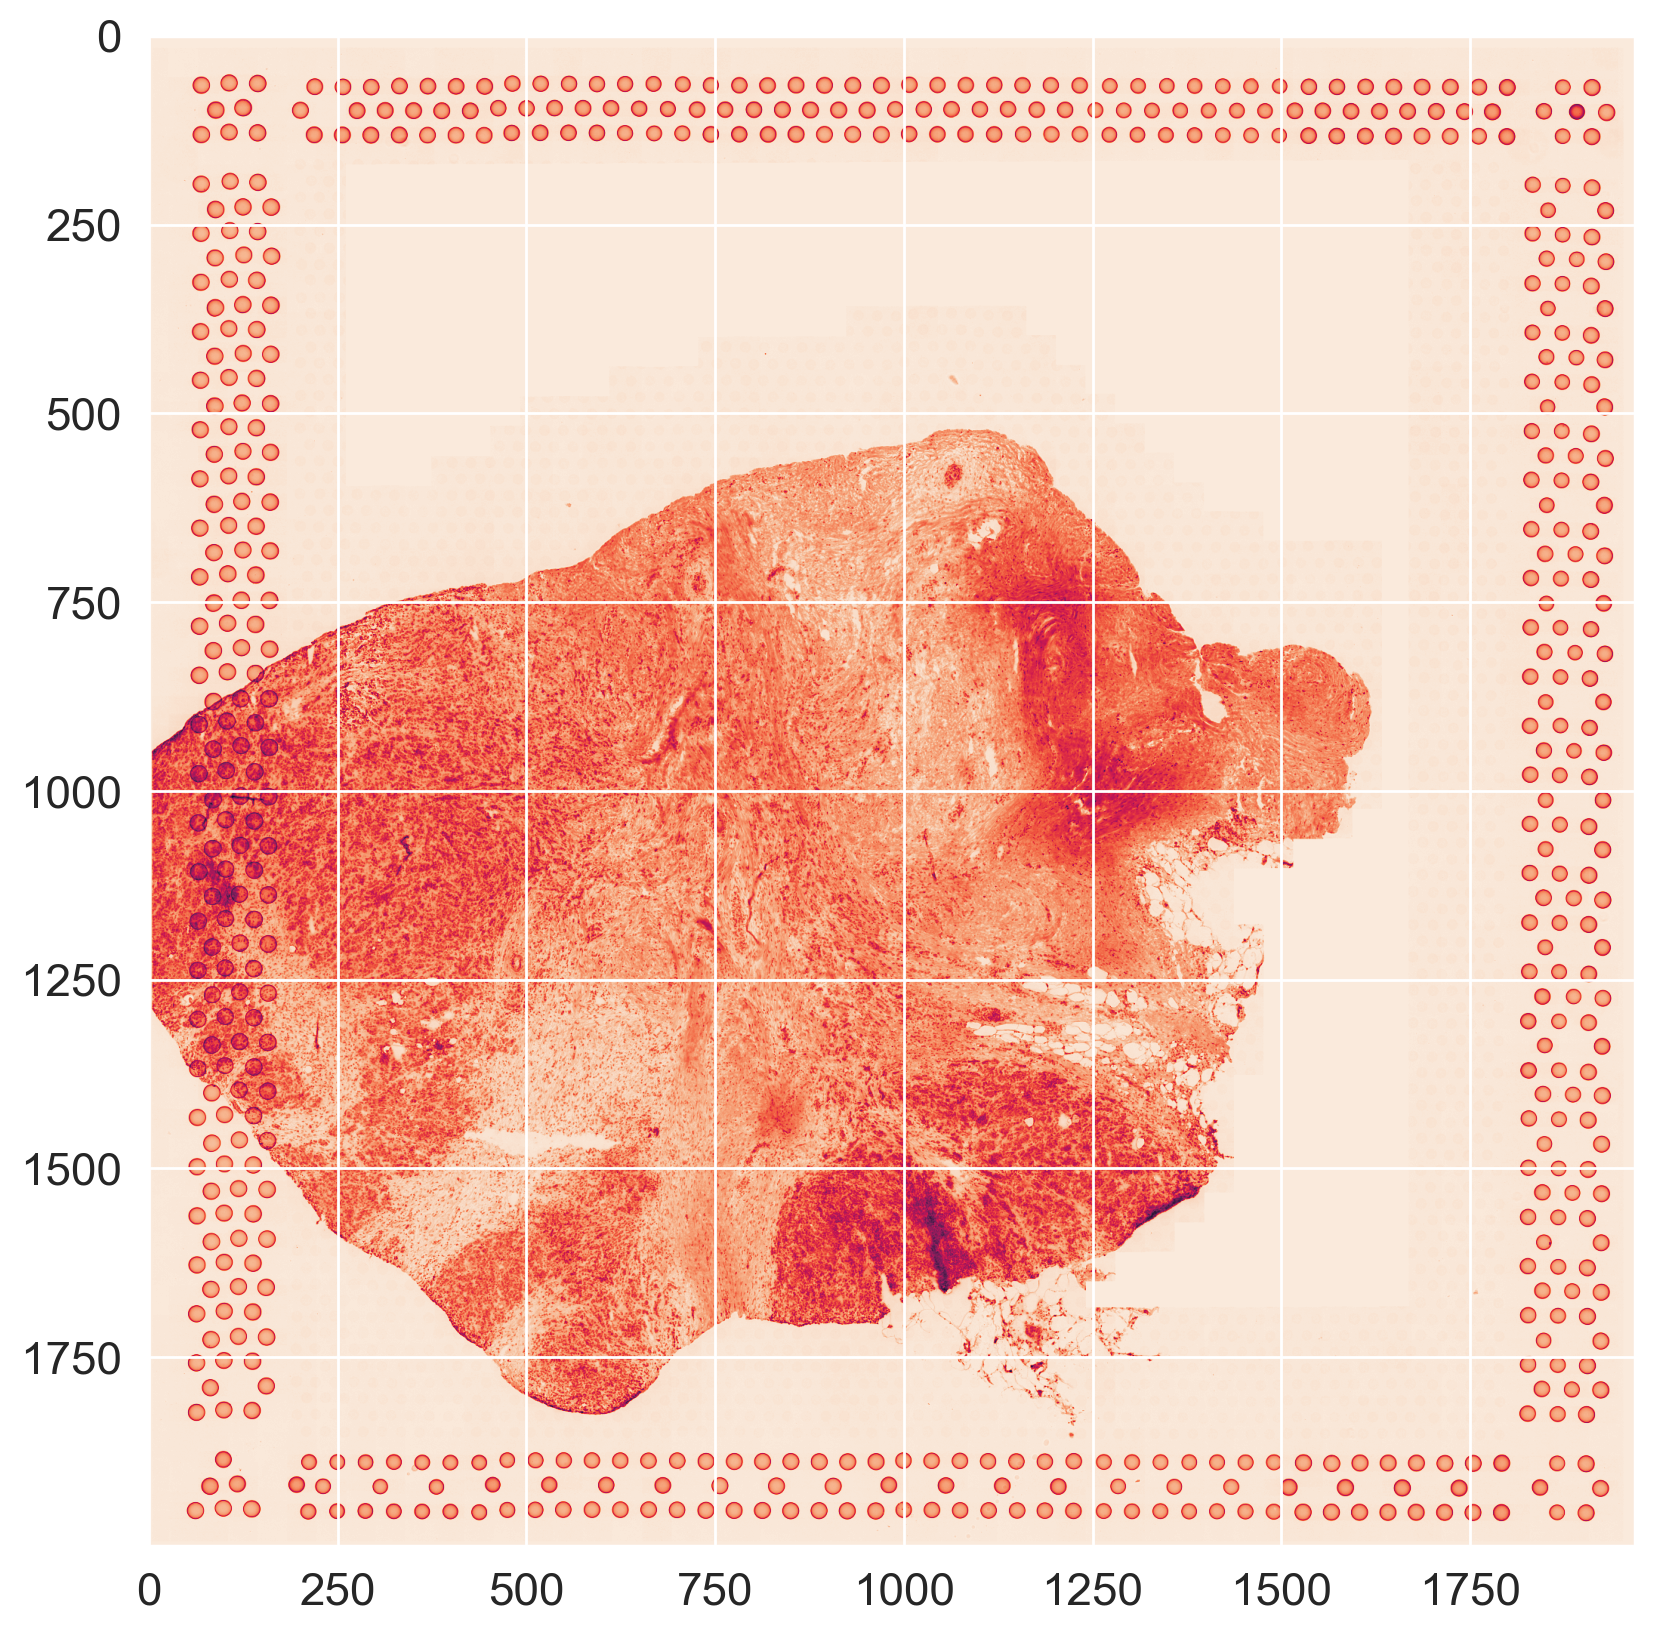

In [265]:
plt.figure(dpi=200)
plt.imshow(adata_image[:,:,2])

In [266]:
map_info

Unnamed: 0  array_row  array_col     imagerow  \
0     AAACACCAATAACTGC-1-MBC_1A         59         19  1454.639038   
1     AAACAGCTTTCAGAAG-1-MBC_1A         43          9  1105.620146   
2     AAACAGGGTCTATATT-1-MBC_1A         47         13  1192.950571   
3     AAACATGGTGAGAGGA-1-MBC_1A         62          0  1519.198146   
4     AAACCGGGTAGGTACC-1-MBC_1A         42         28  1084.605127   
...                         ...        ...        ...          ...   
2449  TTGTTCAGTGTGCTAC-1-MBC_1A         24         64   693.919568   
2450  TTGTTGTGTGTCAAGA-1-MBC_1A         31         77   846.959780   
2451  TTGTTTCACATCCAGG-1-MBC_1A         58         42  1433.745143   
2452  TTGTTTCATTAGTCTA-1-MBC_1A         60         30  1476.865298   
2453  TTGTTTCCATACAACT-1-MBC_1A         45         27  1149.951541   

         imagecol  sample  
0      437.439434  MBC_1A  
1      313.347866  MBC_1A  
2      363.129842  MBC_1A  
3      199.309591  MBC_1A  
4      551.296023  MBC_1A  
...           ...     ...  
2449  1003.330903  MBC_1A  
2450  1165.637103  MBC_1A  
2451   725.472378  MBC_1A  
2452   575.096894  MBC_1A  
2453   538.577999  MBC_1A  

[2454 rows x 6 columns]

In [267]:
i = 10
patch_r=13
cropped_img_stack = []
cropped_img_mean_stack0 = []
cropped_img_mean_stack1 = []
cropped_img_mean_stack2 = []

for i in range(map_info.shape[0]):
    img_xmin = int(map_info.iloc[i]['imagecol'])-patch_r
    img_xmax = int(map_info.iloc[i]['imagecol'])+patch_r
    img_ymin = int(map_info.iloc[i]['imagerow'])-patch_r
    img_ymax = int(map_info.iloc[i]['imagerow'])+patch_r
    cropped_img_stack.append(adata_image[img_ymin:img_ymax,img_xmin:img_xmax])
    
    cropped_img_mean_stack0.append(wholeimg_stitch[:,:,image_slide_z][img_ymin:img_ymax,img_xmin:img_xmax].mean())
    #cropped_img_mean_stack0.append(adata_image[img_ymin:img_ymax,img_xmin:img_xmax][:,:,0].mean())
    #cropped_img_mean_stack1.append(adata_image[img_ymin:img_ymax,img_xmin:img_xmax][:,:,1].mean())
    #cropped_img_mean_stack2.append(adata_image[img_ymin:img_ymax,img_xmin:img_xmax][:,:,2].mean())

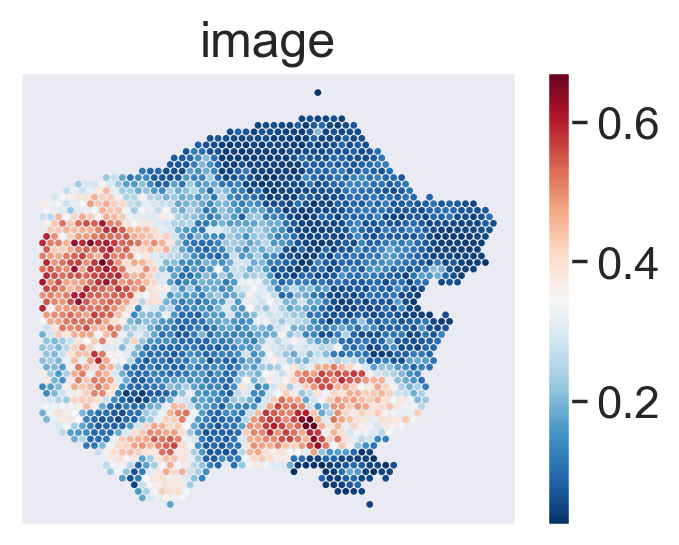

In [270]:
all_spot = mu_poe_stack_df
    
all_loc = np.array(map_info.loc[map_info['sample']==sample_id,['array_col','array_row']])
    
fig,ax= plt.subplots(1,1,figsize=(4,3),dpi=200)
for i in range(1):
    for j in range(1):
            plotted_cell_idx = 15
            if plotted_cell_idx<mu_poe_stack_df.shape[1]:
                plotted_cell= mu_poe_stack_df.columns[plotted_cell_idx]
                #ax=axs[i,j]
                
                #ddd = ddd/ddd.max()
                ddd = pd.DataFrame(all_spot.loc[:,plotted_cell])
                ddd = np.array(ddd)
                ddd = cropped_img_mean_stack0
                #ddd = np.array(ddd.T.apply(zscore).T)
                #ddd = (ddd-ddd.min())/(ddd.max()-ddd.min())
                #ddd = np.clip(ddd, -1, 2)
                g=ax.scatter(all_loc[:,0],-all_loc[:,1],s=2,c=ddd,cmap='RdBu_r',
                             #vmin=c_min, vmax=c_max
                            )
                plt.colorbar(g, ax=ax)
                ax.set_title('image')
                ax.set_xticks([])
                ax.set_yticks([]) 

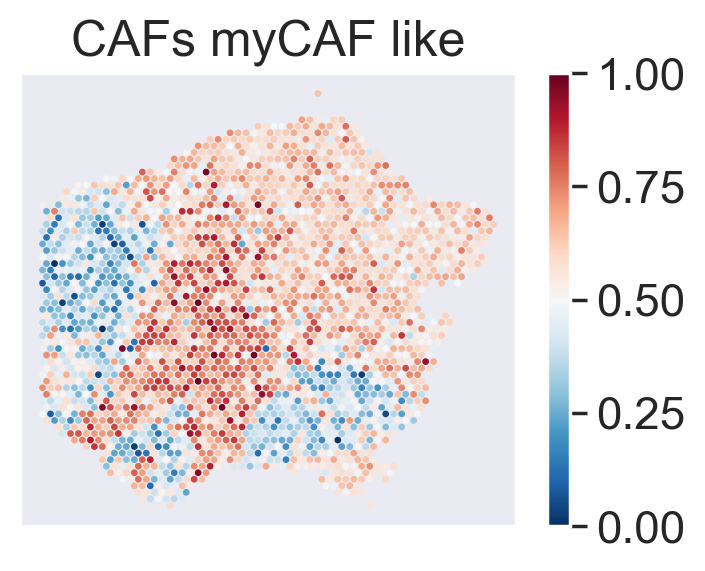

In [271]:
for sample_id in sample_ids:
    
    
    map_info = pd.read_csv("../results/02_PoE_factor/"+sample_id+'map_info.csv')
    
    mu_poe_stack_df = pd.read_csv("../results/02_PoE_factor/"+sample_id+'nb_file.csv')
    mu_poe_stack_df.index = mu_poe_stack_df.iloc[:,0]
    mu_poe_stack_df = mu_poe_stack_df.drop(mu_poe_stack_df.columns[0], axis=1)
    mu_poe_stack_df = (mu_poe_stack_df-mu_poe_stack_df.min())/(mu_poe_stack_df.max()-mu_poe_stack_df.min())
    #mu_poe_stack_df = mu_poe_stack_df.T.apply(zscore).T    
    #c_max = 1#0.5
    #c_min = 0#-1.5
    
    c_max = 2
    c_min = -2
    
    all_spot = mu_poe_stack_df
    
    all_loc = np.array(map_info.loc[map_info['sample']==sample_id,['array_col','array_row']])
    
    fig,ax= plt.subplots(1,1,figsize=(4,3),dpi=200)
    for i in range(1):
        for j in range(1):
            plotted_cell_idx = 21
            if plotted_cell_idx<mu_poe_stack_df.shape[1]:
                plotted_cell= mu_poe_stack_df.columns[plotted_cell_idx]
                #ax=axs[i,j]
                
                #ddd = ddd/ddd.max()
                ddd = pd.DataFrame(all_spot.loc[:,plotted_cell])
                ddd = np.array(ddd)
                #ddd = np.array(ddd.T.apply(zscore).T)
                #ddd = (ddd-ddd.min())/(ddd.max()-ddd.min())
                #ddd = np.clip(ddd, -1, 2)
                #ddd = mu_poe_stack_df.sum(axis=1)
                g=ax.scatter(all_loc[:,0],-all_loc[:,1],s=2,c=ddd,cmap='RdBu_r',
                             #vmin=c_min, vmax=c_max
                            )
                plt.colorbar(g, ax=ax)
                ax.set_title(plotted_cell)
                ax.set_xticks([])
                ax.set_yticks([]) 

In [272]:
from scipy.stats import gaussian_kde
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
from torch.utils.data import DataLoader
def calc_r2(x, y):
    if x.ndim == 1:
        x = np.expand_dims(x, axis=1)
    reg = LinearRegression().fit(x, y)
    r2 = reg.score(x, y)
    return r2
def display_reconst(df_true,
                    df_pred,
                    density=False,
                    marker_genes=None,
                    sample_rate=0.1,
                    size=(5, 5),
                    spot_size=15,
                    title=None
                    ):
    """
    Scatter plot - raw gexp vs. reconstructed gexp
    """
    assert 0 < sample_rate <= 1, \
        "Invalid downsampling rate for reconstruct scatter plot: {}".format(sample_rate)

    if marker_genes is not None:
        marker_genes = set(marker_genes)

    df_true_sample = df_true.sample(frac=sample_rate, random_state=0)
    df_pred_sample = df_pred.loc[df_true_sample.index]

    plt.rcParams["figure.figsize"] = size
    ax = plt.gca()

    xx = df_true_sample.T.to_numpy().flatten()
    yy = df_pred_sample.T.to_numpy().flatten()

    if density:
        for gene in df_true_sample.columns:
            try:
                gene_true = df_true_sample[gene].values
                gene_pred = df_pred_sample[gene].values
                gexp_stacked = np.vstack([df_true_sample[gene].values, df_pred_sample[gene].values])

                z = gaussian_kde(gexp_stacked)(gexp_stacked)
                ax.scatter(gene_true, gene_pred, c=z, s=spot_size, alpha=1,cmap='jet')
            except np.linalg.LinAlgError as e:
                pass

    elif marker_genes is not None:
        color_dict = {True: 'red', False: 'green'}
        gene_colors = np.vectorize(
            lambda x: color_dict[x in marker_genes]
        )(df_true_sample.columns)
        colors = np.repeat(gene_colors, df_true_sample.shape[0])

        ax.scatter(xx, yy, c=colors, s=spot_size, alpha=2)

    else:
        ax.scatter(xx, yy, s=spot_size, alpha=2)
        
        
    

    min_val = min(xx.min(), yy.min())
    max_val = max(xx.max(), yy.max())
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)


    plt.suptitle(title)
    #plt.xlabel('Ground-truth')
    #plt.ylabel('Reconstructed')
    
    #m, b = np.polyfit(xx, yy, 1)
    #plt.plot(xx, m*xx + b)
    #print('m=',m,' and b =',b)


    plt.show()

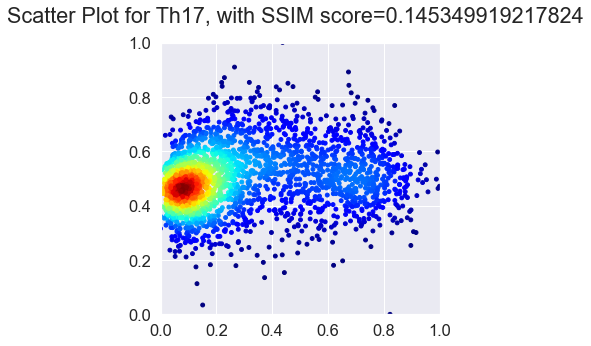

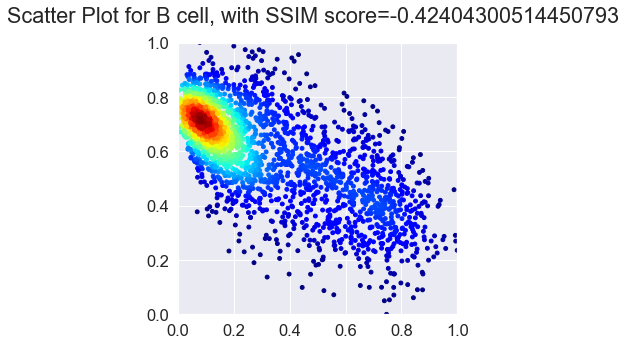

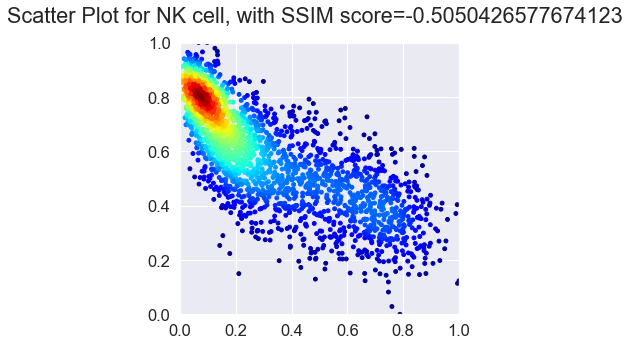

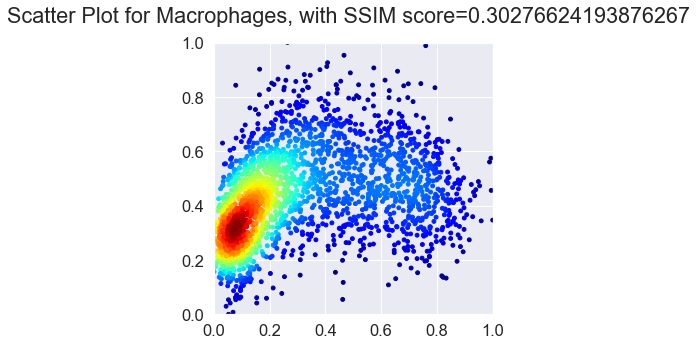

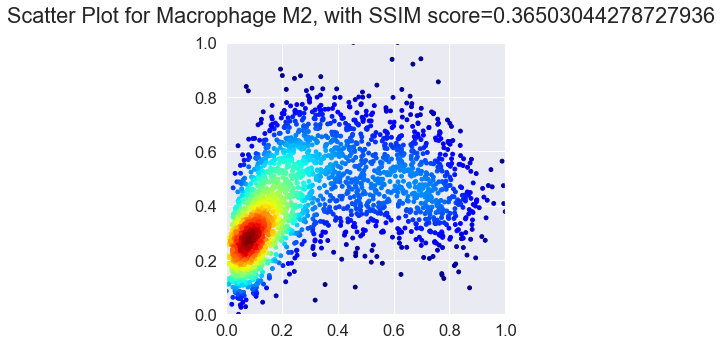

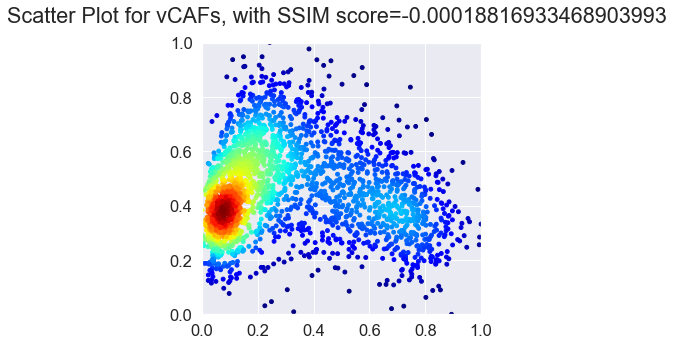

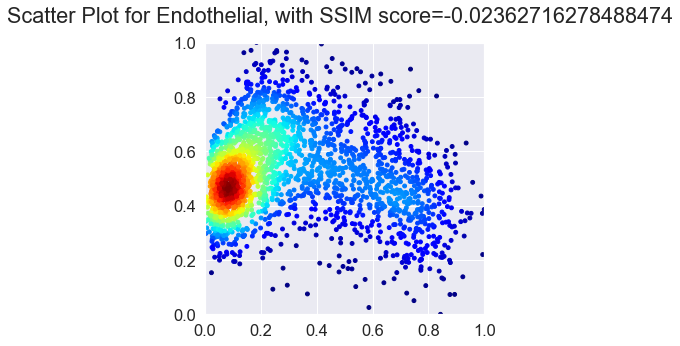

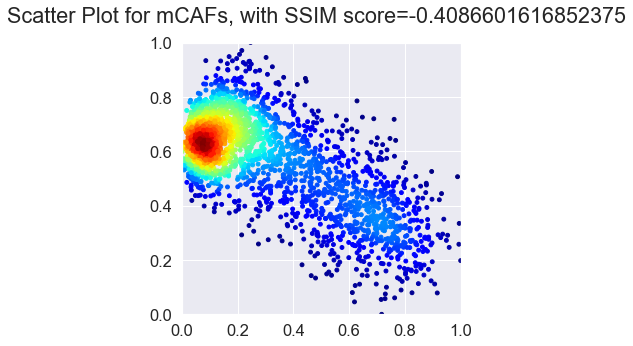

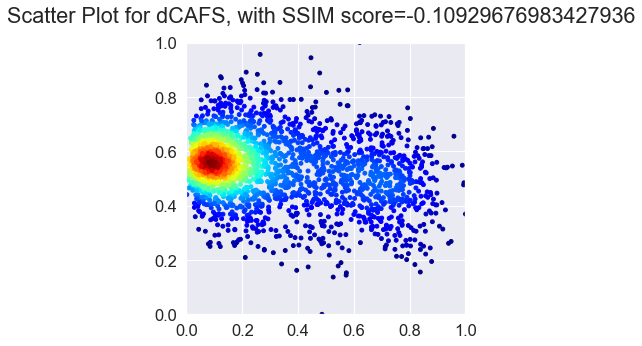

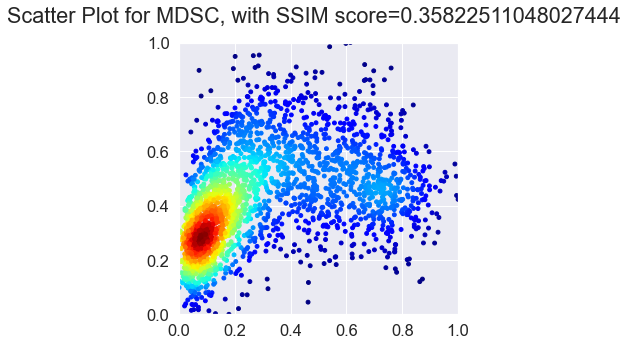

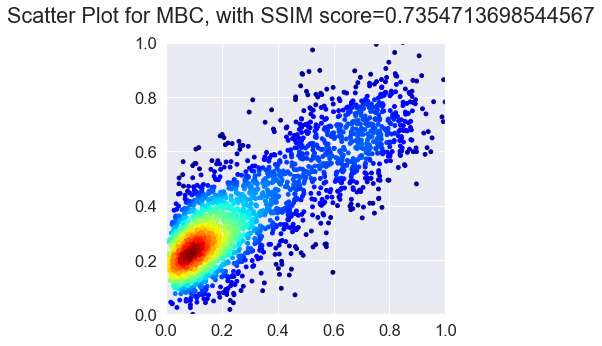

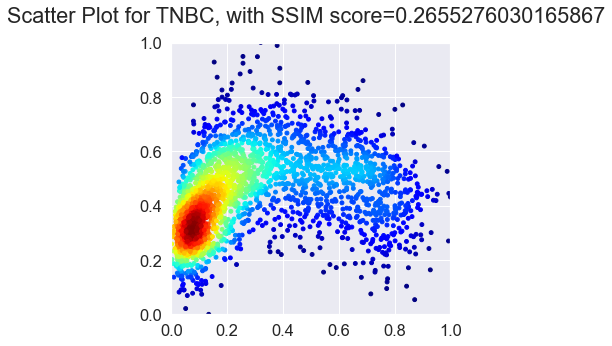

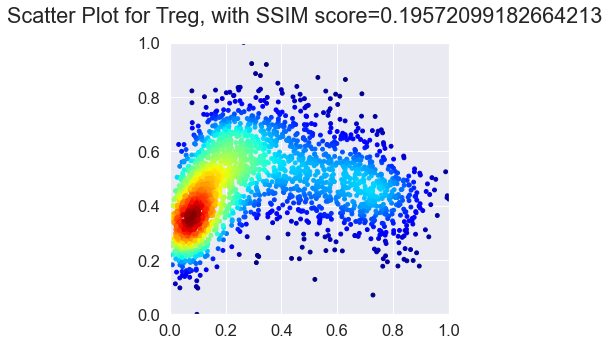

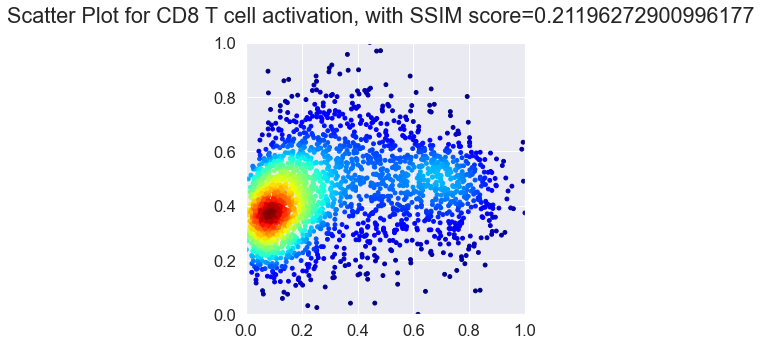

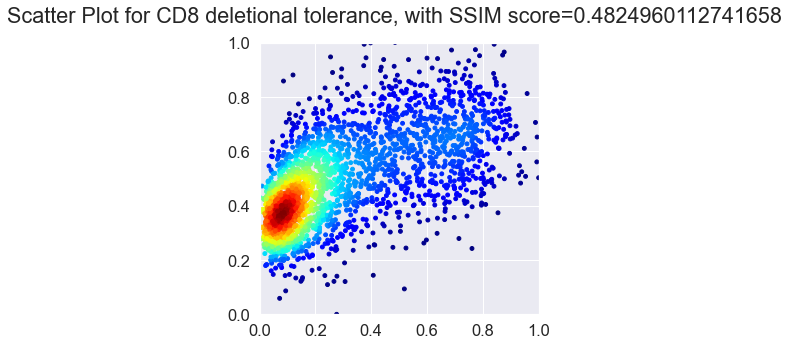

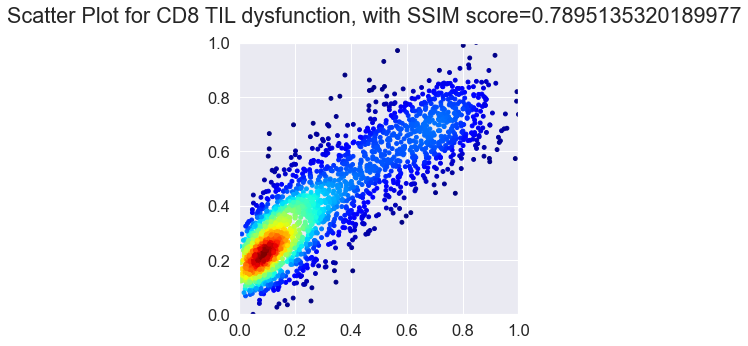

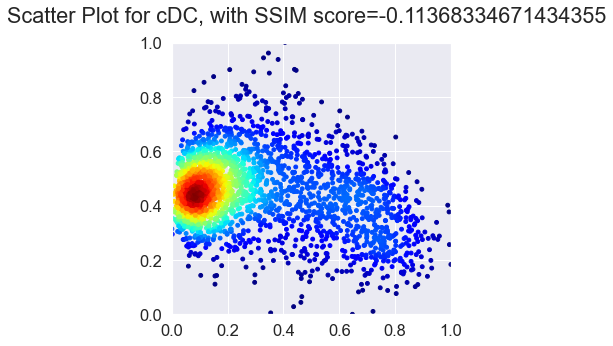

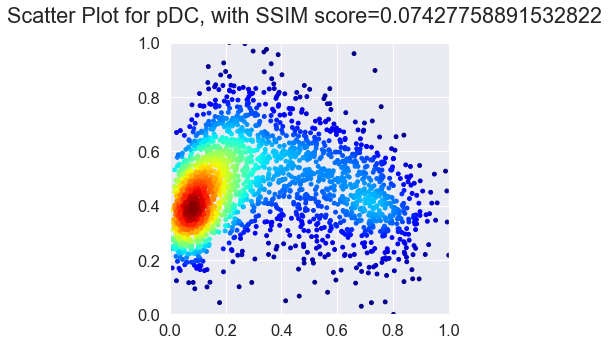

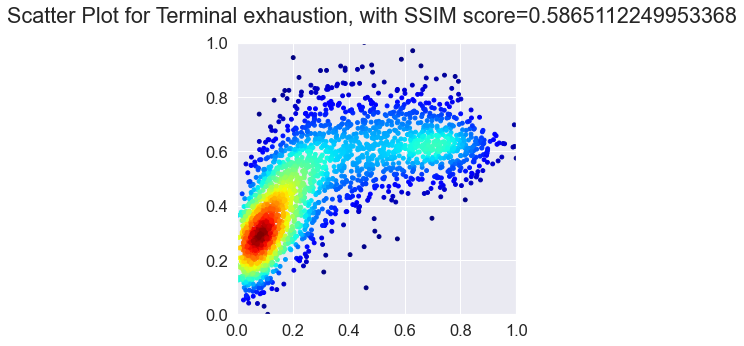

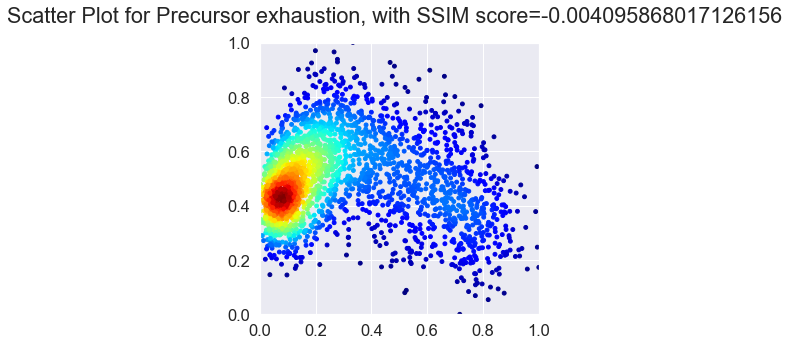

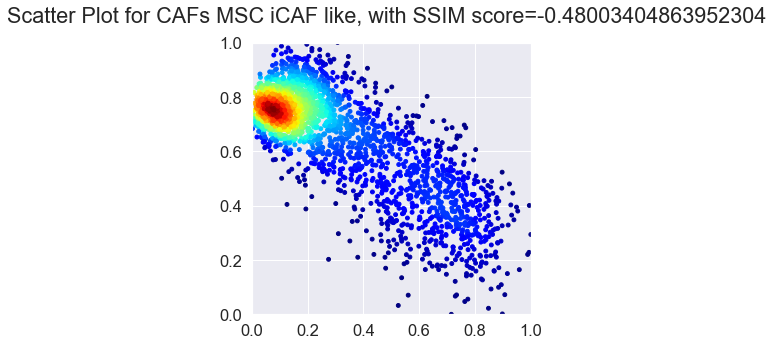

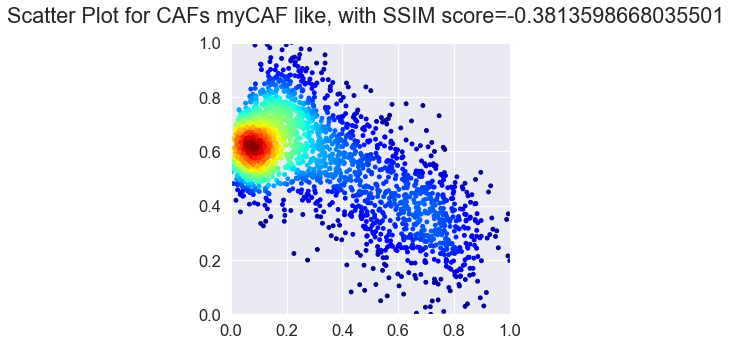

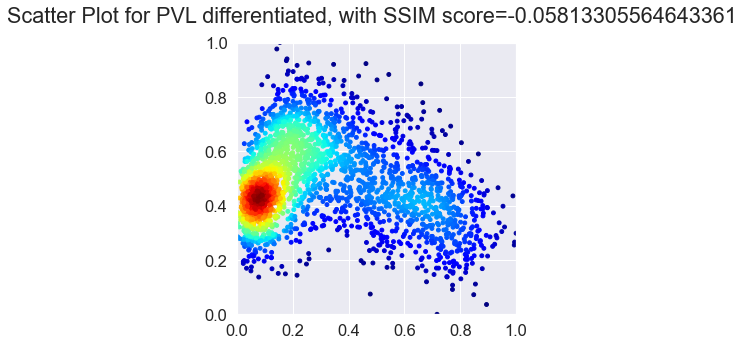

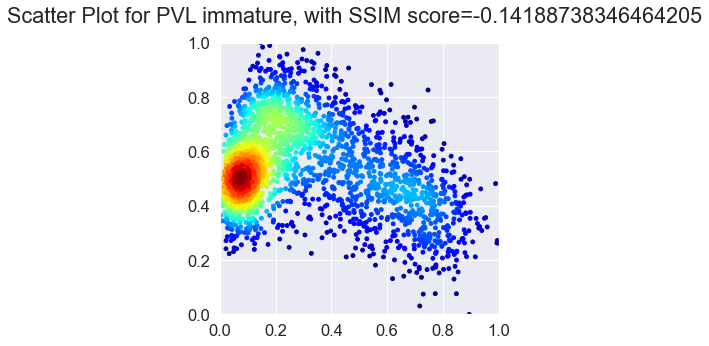

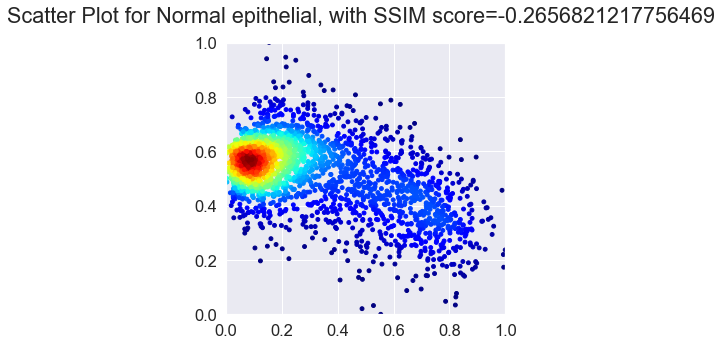

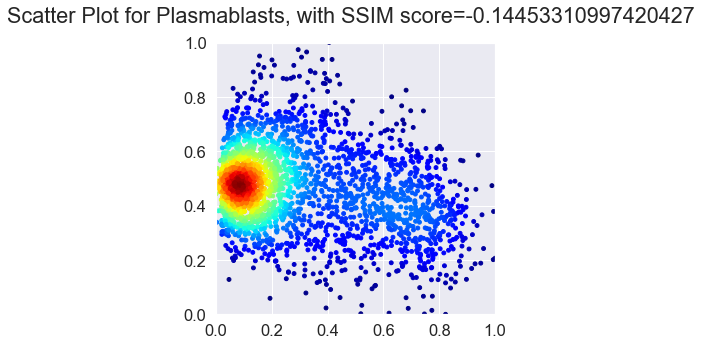

In [273]:
cropped_img_mean_stack0_norm = np.array(cropped_img_mean_stack0)
cropped_img_mean_stack0_norm = (cropped_img_mean_stack0_norm-cropped_img_mean_stack0_norm.min())/(cropped_img_mean_stack0_norm.max()-cropped_img_mean_stack0_norm.min())
from skimage.metrics import structural_similarity as ssim
for plotted_cell_idx in range(26):
    
    plotted_cell= mu_poe_stack_df.columns[plotted_cell_idx]
    #ddd = pd.DataFrame(all_spot.loc[:,plotted_cell])
    ddd = np.array(all_spot.loc[:,plotted_cell])
    ddd = (ddd-ddd.min())/(ddd.max()-ddd.min())
    r2 = calc_r2(cropped_img_mean_stack0_norm, ddd)

    display_reconst(
            pd.DataFrame(np.array(cropped_img_mean_stack0_norm)),
            pd.DataFrame(np.array(ddd)),
            sample_rate=1,
            density=True,
            #title='Gene express reconstruction (exp)\n' + r'$R^2$=' + str(round(r2, 2))
            title = 'Scatter Plot for '+plotted_cell+', with SSIM score='+str(ssim(cropped_img_mean_stack0_norm.astype("float"), ddd.astype("float")))
    )

working on  MBC_1A


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Preprocessing1: delete the mt and rp
Preprocessing2: Normalize
Preprocessing3: Logarithm
Preprocessing4: Find the variable genes


/Users/siyuhe/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
<ipython-input-274-cc73733b37b2>:101: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_sig.columns = df_sig.columns.str.replace('.', ' ')
<ipython-input-274-cc73733b37b2>:104: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_sig.columns = df_sig.columns.str.replace('+', '')


the number of original variable genes in the dataset (2000,)
the number of siganture genes in the dataset (537,)
after filter out some genes in the signature not in the var_names ... (513,)
after filter out some genes not highly expressed in the signature ... (487,)
combine the varibale and siganture, the total unique gene number is ... 2382


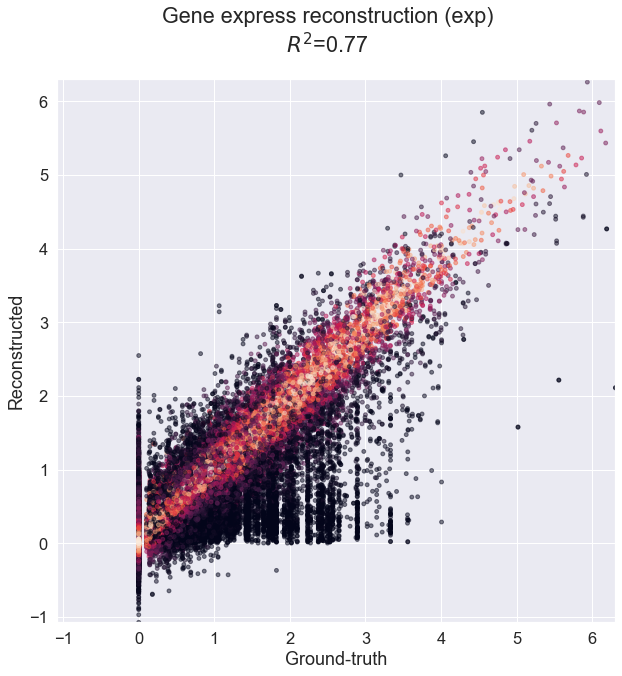

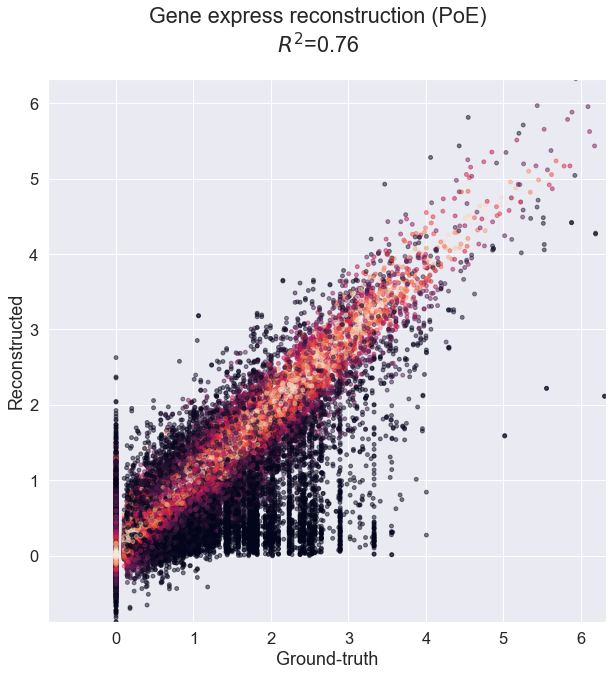

In [274]:
from scipy.stats import gaussian_kde
def display_reconst(df_true,
                    df_pred,
                    density=False,
                    marker_genes=None,
                    sample_rate=0.1,
                    size=(10, 10),
                    spot_size=15,
                    title=None
                    ):
    """
    Scatter plot - raw gexp vs. reconstructed gexp
    """
    assert 0 < sample_rate <= 1, \
        "Invalid downsampling rate for reconstruct scatter plot: {}".format(sample_rate)

    if marker_genes is not None:
        marker_genes = set(marker_genes)

    df_true_sample = df_true.sample(frac=sample_rate, random_state=0)
    df_pred_sample = df_pred.loc[df_true_sample.index]

    plt.rcParams["figure.figsize"] = size
    ax = plt.gca()

    xx = df_true_sample.T.to_numpy().flatten()
    yy = df_pred_sample.T.to_numpy().flatten()

    if density:
        for gene in df_true_sample.columns:
            try:
                gene_true = df_true_sample[gene].values
                gene_pred = df_pred_sample[gene].values
                gexp_stacked = np.vstack([df_true_sample[gene].values, df_pred_sample[gene].values])

                z = gaussian_kde(gexp_stacked)(gexp_stacked)
                ax.scatter(gene_true, gene_pred, c=z, s=spot_size, alpha=0.5)
            except np.linalg.LinAlgError as e:
                pass

    elif marker_genes is not None:
        color_dict = {True: 'red', False: 'green'}
        gene_colors = np.vectorize(
            lambda x: color_dict[x in marker_genes]
        )(df_true_sample.columns)
        colors = np.repeat(gene_colors, df_true_sample.shape[0])

        ax.scatter(xx, yy, c=colors, s=spot_size, alpha=0.5)

    else:
        ax.scatter(xx, yy, s=spot_size, alpha=0.5)

    min_val = min(xx.min(), yy.min())
    max_val = max(xx.max(), yy.max())
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)

    plt.suptitle(title)
    plt.xlabel('Ground-truth')
    plt.ylabel('Reconstructed')

    plt.show()
def gene_for_train(adata, df_sig):
    """find the varibale gene name, the mattered gene signatures, and the combined variable+signature for training"""
    
    variable_gene = adata.var_names[adata.var['highly_variable']]
    print('the number of original variable genes in the dataset',variable_gene.shape)
    print('the number of siganture genes in the dataset',np.unique(df_sig.values.flatten().astype(str)).shape)
    
    # filter out some genes in the signature not in the var_names
    sig_gname_filtered =  np.intersect1d(adata.var_names,np.unique(df_sig.values.flatten().astype(str)))
    print('after filter out some genes in the signature not in the var_names ...',sig_gname_filtered.shape)
    # filter out some genes not highly expressed in the signature
    sig_gname_filtered = sig_gname_filtered[adata.to_df().loc[:,sig_gname_filtered].sum()>0]
    print('after filter out some genes not highly expressed in the signature ...', sig_gname_filtered.shape)
    
    sig_variable_gene_inter  = set([*np.array(variable_gene) ,*sig_gname_filtered])
    print('combine the varibale and siganture, the total unique gene number is ...', len(sig_variable_gene_inter))
    
    return variable_gene, sig_gname_filtered, sig_variable_gene_inter

for sample_id in sample_ids:
    print('working on ', sample_id)
    data_path = '../data'
    if sample_id.startswith('MBC'):

        adata_sample = sc.read_visium(path=os.path.join(data_path, sample_id),library_id =  sample_id)
        adata_sample.var_names_make_unique()
        adata_sample.obs['sample']=sample_id
        adata_sample.obs_names  = adata_sample.obs_names+'-'+sample_id
    else:
        adata_sample = sc.read_h5ad(os.path.join(data_path,sample_id, sample_id+'.h5ad'))
        adata_sample.var_names_make_unique()
        adata_sample.obs['sample']=sample_id
        adata_sample.obs_names  = adata_sample.obs_names+'-'+sample_id
    
    adata_sample = utils.exp_preprocess(adata_sample,n_top_genes=2000) 
    signature_path = data_path
    sig_fname = os.path.join(signature_path,  'bc_signatures_version_1216.csv')
    df_sig = pd.read_csv(sig_fname)
    df_sig.columns = df_sig.columns.str.replace('.', ' ')
    df_sig.columns = df_sig.columns.str.replace('_', ' ')
    df_sig.columns = df_sig.columns.str.replace('-', ' ')
    df_sig.columns = df_sig.columns.str.replace('+', '')
    
    variable_gene, sig_gname_filtered, sig_variable_gene_inter = gene_for_train(adata_sample, df_sig)
    # prepare dataset for training
    adata_df_variable = adata_sample.to_df().loc[:,variable_gene]
    adata_df_signature = adata_sample.to_df().loc[:,sig_gname_filtered]
    
    adata_df_concat = pd.concat([adata_df_variable,adata_df_signature], axis=1)
    
    recon_exp_stack = np.load("../results/02_PoE_factor/"+sample_id+'recon_exp_stack.npy')
    
    r2 = calc_r2(adata_df_concat.to_numpy().flatten(), pd.DataFrame(recon_exp_stack).to_numpy().flatten())

    display_reconst(
        pd.DataFrame(np.array(adata_df_concat)),
        pd.DataFrame(np.array(recon_exp_stack)),
        sample_rate=0.05,
        density=True,
        title='Gene express reconstruction (exp)\n' + 
          r'$R^2$=' + str(round(r2, 2))
    )
    
    recon_poe_rna_stack = np.load("../results/02_PoE_factor/"+sample_id+'recon_poe_rna_stack.npy')
    r2 = calc_r2(adata_df_concat.to_numpy().flatten(), pd.DataFrame(recon_poe_rna_stack).to_numpy().flatten())

    display_reconst(
        pd.DataFrame(np.array(adata_df_concat)),
        pd.DataFrame(np.array(recon_poe_rna_stack)),
        sample_rate=0.05,
        density=True,
        title='Gene express reconstruction (PoE)\n' + r'$R^2$=' + str(round(r2, 2))
    )
    
    
        
    

In [276]:
from scipy.stats import gaussian_kde
def display_reconst(df_true,
                    df_pred,
                    density=False,
                    marker_genes=None,
                    sample_rate=0.1,
                    size=(10, 10),
                    spot_size=15,
                    title=None
                    ):
    """
    Scatter plot - raw gexp vs. reconstructed gexp
    """
    assert 0 < sample_rate <= 1, \
        "Invalid downsampling rate for reconstruct scatter plot: {}".format(sample_rate)

    if marker_genes is not None:
        marker_genes = set(marker_genes)

    df_true_sample = df_true.sample(frac=sample_rate, random_state=0)
    df_pred_sample = df_pred.loc[df_true_sample.index]

    plt.rcParams["figure.figsize"] = size
    ax = plt.gca()

    xx = df_true_sample.T.to_numpy().flatten()
    yy = df_pred_sample.T.to_numpy().flatten()

    if density:
        for gene in df_true_sample.columns:
            try:
                gene_true = df_true_sample[gene].values
                gene_pred = df_pred_sample[gene].values
                gexp_stacked = np.vstack([df_true_sample[gene].values, df_pred_sample[gene].values])

                z = gaussian_kde(gexp_stacked)(gexp_stacked)
                ax.scatter(gene_true, gene_pred, c=z, s=spot_size, alpha=0.5)
            except np.linalg.LinAlgError as e:
                pass

    elif marker_genes is not None:
        color_dict = {True: 'red', False: 'green'}
        gene_colors = np.vectorize(
            lambda x: color_dict[x in marker_genes]
        )(df_true_sample.columns)
        colors = np.repeat(gene_colors, df_true_sample.shape[0])

        ax.scatter(xx, yy, c=colors, s=spot_size, alpha=0.5)

    else:
        ax.scatter(xx, yy, s=spot_size, alpha=0.5)

    min_val = min(xx.min(), yy.min())
    max_val = max(xx.max(), yy.max())
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)

    plt.suptitle(title)
    plt.xlabel('Reconstructed exp from exp model')
    plt.ylabel('Reconstructed exp from PoE model')

    plt.show()

In [277]:
from scipy.stats import gaussian_kde
def display_reconst(df_true,
                    df_pred,
                    density=False,
                    marker_genes=None,
                    sample_rate=0.1,
                    size=(10, 10),
                    spot_size=15,
                    title=None
                    ):
    """
    Scatter plot - raw gexp vs. reconstructed gexp
    """
    assert 0 < sample_rate <= 1, \
        "Invalid downsampling rate for reconstruct scatter plot: {}".format(sample_rate)

    if marker_genes is not None:
        marker_genes = set(marker_genes)

    df_true_sample = df_true.sample(frac=sample_rate, random_state=0)
    df_pred_sample = df_pred.loc[df_true_sample.index]

    plt.rcParams["figure.figsize"] = size
    ax = plt.gca()

    xx = df_true_sample.T.to_numpy().flatten()
    yy = df_pred_sample.T.to_numpy().flatten()

    if density:
        for gene in df_true_sample.columns:
            try:
                gene_true = df_true_sample[gene].values
                gene_pred = df_pred_sample[gene].values
                gexp_stacked = np.vstack([df_true_sample[gene].values, df_pred_sample[gene].values])

                z = gaussian_kde(gexp_stacked)(gexp_stacked)
                ax.scatter(gene_true, gene_pred, c=z, s=spot_size, alpha=0.5)
            except np.linalg.LinAlgError as e:
                pass

    elif marker_genes is not None:
        color_dict = {True: 'red', False: 'green'}
        gene_colors = np.vectorize(
            lambda x: color_dict[x in marker_genes]
        )(df_true_sample.columns)
        colors = np.repeat(gene_colors, df_true_sample.shape[0])

        ax.scatter(xx, yy, c=colors, s=spot_size, alpha=0.5)

    else:
        ax.scatter(xx, yy, s=spot_size, alpha=0.5)

    min_val = min(xx.min(), yy.min())
    max_val = max(xx.max(), yy.max())
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)

    plt.suptitle(title)
    plt.xlabel('Factor from exp model')
    plt.ylabel('Factor from PoE model')

    plt.show()

In [278]:
def calc_diag_score(A, eps=1e-10):
    """
    Measure accuracy (how diagonal) a correlation matrix is
    Metrics:
     - F1 score: TP / (TP + 1/2(FP + FN))
    """
    A = np.asarray(A)
    #A[A < 0] = 0
    A = (A-A.min())/(A.max()-A.min())
    tp = np.trace(A)/ A.shape[0] *2
    print('tp=',tp)
    fp_fn = A.sum()/(A.shape[0]*A.shape[1])  #- tp
    print('fp_fn=',fp_fn)
    score = tp / (tp + 0.5 * fp_fn + eps)

    return score

In [279]:
def calc_corr_gsva(z, spots, df_gsva):
    """Calculate correlation between VAE latent space (z) & GSVA score of selected spots"""
    df_z = pd.DataFrame(
        z,
        index=spots,
        columns=['bn{}'.format(i + 1) for i in range(z.shape[1])]
    )

    # Initialize correlation matrix, assign value & normalize by row
    df_corr = pd.concat(
        [df_z, df_gsva.loc[spots, :]],
        axis=1,
        keys=['bn', 'gsva']
    ).corr().loc['bn', 'gsva']
    df_corr = df_corr.divide(df_corr.max(axis=1), axis=0)

    return df_corr

In [280]:
def display_corr_gsva(df_corr,
                      cluster=False,
                      title=None,
                      size=(12, 20)
                      ):
    """
    Correlation heatmap - Bottle-neck (latent) values vs. GSVA score

    Parameters
    ----------
    df_corr : pd.DataFrame
        DataFrame of correlation between factors & learnt latent variable

    cluster : bool [default=False]
        Whether perform hierarchical clustering on axes
    """
    # Performance metrics: F1-score as diagonalizedness measurement
    score = str(round(calc_diag_score(df_corr), 2))

    # Plotting specs
    sns.set(font_scale=1.5)
    cmap = colormap.get_cmap('RdBu')

    g = sns.clustermap(df_corr, cmap=cmap.reversed(), row_cluster=cluster, col_cluster=cluster)
    g.fig.set_size_inches(size[0], size[1])
    ax = g.ax_heatmap

    ax.set_xticks(np.arange(len(df_corr.columns)))
    ax.set_yticks(np.arange(len(df_corr.index)))
    ax.set_xticklabels(df_corr.columns)
    ax.set_yticklabels(df_corr.index)

    plt.suptitle(title + '; F1-score={}'.format(score))
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
    plt.show()

In [283]:
df_gsva_raw= pd.read_csv(os.path.join('../results/01_gsva_folder', sample_id+'_gsva.csv'), index_col=0).transpose()
df_gsva_raw.index = df_gsva_raw.index+'-'+sample_id
df_gsva_raw.columns = df_sig.columns

#c_sig = calc_corr_gsva(mu_peri.cpu().detach().numpy(),perif_spots,df_gsva_raw)

mu_exp_stack = np.load("../results/02_PoE_factor/"+sample_id+'mu_exp_stack.npy')
c_exp = calc_corr_gsva( mu_exp_stack, adata_df_variable.index, df_gsva_raw)

mu_poe_stack = np.load("../results/02_PoE_factor/"+sample_id+'mu_poe_stack.npy')
c_poe = calc_corr_gsva(mu_poe_stack,adata_df_variable.index, df_gsva_raw)

tp= 1.999204539469712
fp_fn= 0.590433173593396


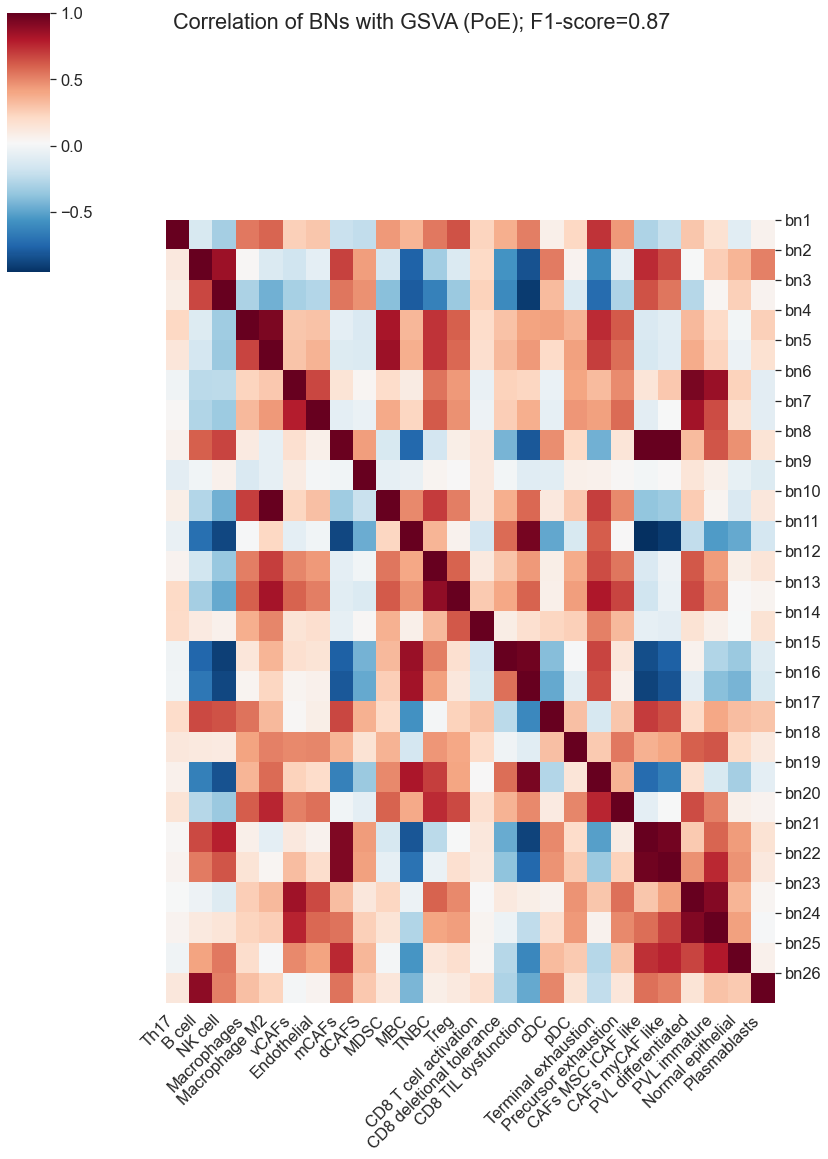

In [286]:
#sig_loss_avg = np.mean([losses[-1]['sig'] for losses in losses_list]).round(2)
import matplotlib.cm as colormap
#df_corr_bn_avg = pd.DataFrame(np.array(c_sig),index=c_sig.index,columns=c_sig.columns)

df_c_exp = pd.DataFrame(np.array(c_exp),index=c_exp.index,columns=c_exp.columns)


df_c_poe = pd.DataFrame(np.array(c_poe),index=c_poe.index,columns=c_poe.columns)

#display_corr_gsva(df_corr_bn_avg,title='Correlation of BNs with GSVA (sig)',cluster=False)

#display_corr_gsva(df_c_exp,title='Correlation of BNs with GSVA (exp)',cluster=False)

display_corr_gsva(df_c_poe, title='Correlation of BNs with GSVA (PoE)',cluster=False)